In [1]:
#importing libraries and dataset
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
#df=pd.read_excel(r"C:\Users\user\Desktop\travel_data.xlsx")
#df=pd.read_excel(r""
#df = pd.read_excel("travel_data.xlsx")
df = pd.read_csv('travel_data.csv', header = None)

In [2]:
df.head()

0    1
0  1949-01  112
1  1949-02  118
2  1949-03  132
3  1949-04  129
4  1949-05  121

In [3]:
# renaming the columns
df.rename(columns = {0:'time', 1:'travellers'}, inplace = True)
df.head()

time  travellers
0  1949-01         112
1  1949-02         118
2  1949-03         132
3  1949-04         129
4  1949-05         121

In [4]:
# seeing statistical information of dataset
df.describe()

travellers
count  144.000000
mean   280.298611
std    119.966317
min    104.000000
25%    180.000000
50%    265.500000
75%    360.500000
max    622.000000

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   time        144 non-null    object
 1   travellers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [6]:
#seeing timeframe of entire dataset
print(df['time'].min())

print(df['time'].max())

1949-01
1960-12


In [7]:
#arranging data in a particular format
df['year_month'] = pd.to_datetime(df['time']) 
df

time  travellers year_month
0    1949-01         112 1949-01-01
1    1949-02         118 1949-02-01
2    1949-03         132 1949-03-01
3    1949-04         129 1949-04-01
4    1949-05         121 1949-05-01
..       ...         ...        ...
139  1960-08         606 1960-08-01
140  1960-09         508 1960-09-01
141  1960-10         461 1960-10-01
142  1960-11         390 1960-11-01
143  1960-12         432 1960-12-01

[144 rows x 3 columns]

In [8]:
#removing column not required
df.drop('time', axis = 1, inplace = True)
df

travellers year_month
0           112 1949-01-01
1           118 1949-02-01
2           132 1949-03-01
3           129 1949-04-01
4           121 1949-05-01
..          ...        ...
139         606 1960-08-01
140         508 1960-09-01
141         461 1960-10-01
142         390 1960-11-01
143         432 1960-12-01

[144 rows x 2 columns]

In [9]:
#making 'year_month' as index and storing in a dummy variable
new_df = df.set_index('year_month')
new_df

travellers
year_month            
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121
...                ...
1960-08-01         606
1960-09-01         508
1960-10-01         461
1960-11-01         390
1960-12-01         432

[144 rows x 1 columns]

In [10]:
#checking unique values
len(df['year_month'].value_counts())

144

In [11]:
#checking for null values
df.isnull().sum()

travellers    0
year_month    0
dtype: int64

<AxesSubplot:xlabel='year_month'>

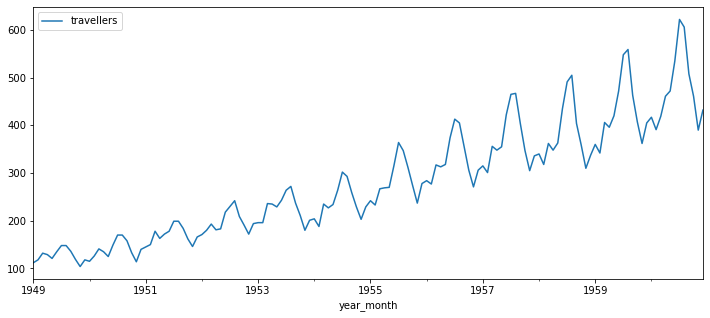

In [12]:
#plotting our dataset
new_df.plot(figsize = (12,5))


In some seasons, travelling rate is high whereas in some seasons, there is a decrease in this rate


over the time, values are increasing overall

C:\Users\user\New folder\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='travellers', ylabel='Density'>

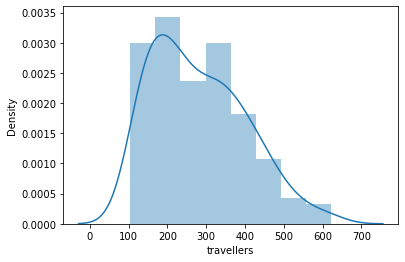

In [13]:
sns.distplot(new_df['travellers'])

<AxesSubplot:ylabel='Density'>

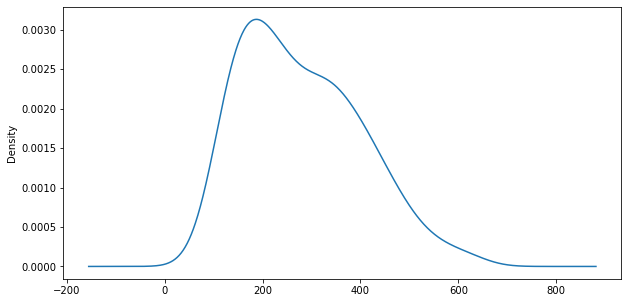

In [14]:
plt.figure(figsize=[10,5])
new_df['travellers'].plot(kind = 'kde')

mean is between 100 to 400


data is right skewed


data is not normally distributed(as is skewed)

C:\Users\user\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year_month', ylabel='travellers'>

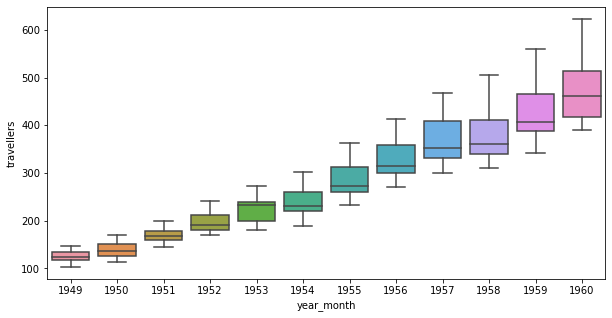

In [15]:
plt.figure(figsize=[10,5])
sns.boxplot(new_df['travellers'].index.year, new_df['travellers'])

boxplot to see median values for every year


median values are increasing gradually


size of boxes is also increasing, which implies that number of travellers is increasing

#1. Decomposing using statsmodel 

In [16]:
pip install pyramid

Note: you may need to restart the kernel to use updated packages.


In [17]:
pip install fbprophet

  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Using cached cmdstanpy-0.9.5-py3-none-any.whl (37 kB)


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\user\New folder\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\user\\AppData\\Local\\Temp\\pip-install-cc44p2es\\fbprophet_e9fdaba9466c4283a987486d25c4dc9f\\setup.py'"'"'; __file__='"'"'C:\\Users\\user\\AppData\\Local\\Temp\\pip-install-cc44p2es\\fbprophet_e9fdaba9466c4283a987486d25c4dc9f\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\user\AppData\Local\Temp\pip-wheel-4k3zbs60'



  Using cached pystan-3.4.0-py3-none-any.whl (13 kB)
  Using cached LunarCalendar-0.0.9-py2.py3-none-any.whl (18 kB)
  Using cached holidays-0.14.2-py3-none-any.whl (179 kB)
  Using cached pystan-3.3.0-py3-none-any.whl (13 kB)
  Using cached pystan-3.2.0-py3-none-any.whl (13 kB)
  Using cached clikit-0.6.2-py2.py3-none-any.whl (91 kB)
  Using cached pysimdjson-3.2.0-cp39-cp39-win_amd64.whl (157 kB)
  Using cached pystan-3.1.1-py3-none-any.whl (13 kB)
  Using cached pystan-3.1.0-py3-none-any.whl (13 kB)
  Using cached pystan-3.0.2-py3-none-any.whl (13 kB)
  Using cached pystan-3.0.1-py3-none-any.whl (12 kB)
  Using cached pystan-3.0.0-py3-none-any.whl (12 kB)
  Using cached pystan-2.19.1.1.tar.gz (16.2 MB)
  Running setup.py clean for fbprophet
  Running setup.py clean for pystan
Failed to build fbprophet pystan
    Running setup.py install for pystan: started
    Running setup.py install for pystan: still running...
    Running setup.py install for pystan: still running...
    Running

       cwd: C:\Users\user\AppData\Local\Temp\pip-install-cc44p2es\fbprophet_e9fdaba9466c4283a987486d25c4dc9f\
  Complete output (194 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib
  creating build\lib\fbprophet
  creating build\lib\fbprophet\stan_model
  --- Logging error ---
  Traceback (most recent call last):
    File "C:\Users\user\New folder\lib\logging\__init__.py", line 1086, in emit
      stream.write(msg + self.terminator)
  ValueError: underlying buffer has been detached
  Call stack:
    File "<string>", line 1, in <module>
    File "C:\Users\user\AppData\Local\Temp\pip-install-cc44p2es\fbprophet_e9fdaba9466c4283a987486d25c4dc9f\setup.py", line 122, in <module>
      setup(
    File "C:\Users\user\New folder\lib\site-packages\setuptools\__init__.py", line 87, in setup
      return distutils.core.setup(**attrs)
    File "C:\Users\user\New folder\lib\site-packages\setuptools\_distutils\core.py", line 148, in setup
      r

In [18]:
import statsmodels.api as sm 
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose 
from statsmodels.tsa.ar_model import AR 
from statsmodels.tsa.arima_model import ARMA, ARIMA
#from pyramid.arima import auto_arima 
from statsmodels.tsa.statespace.sarimax import SARIMAX
# from fbprophet import Prophet

from math import sqrt


    File "<frozen importlib._bootstrap>", line 228, in _call_with_frames_removed
    File "C:\Users\user\AppData\Local\Temp\pip-install-cc44p2es\fbprophet_e9fdaba9466c4283a987486d25c4dc9f\fbprophet\forecaster.py", line 15, in <module>
      import pandas as pd
    File "<frozen importlib._bootstrap>", line 1007, in _find_and_load
    File "<frozen importlib._bootstrap>", line 986, in _find_and_load_unlocked
    File "<frozen importlib._bootstrap>", line 680, in _load_unlocked
    File "<frozen importlib._bootstrap_external>", line 850, in exec_module
    File "<frozen importlib._bootstrap>", line 228, in _call_with_frames_removed
    File "C:\Users\user\New folder\lib\site-packages\pandas\__init__.py", line 48, in <module>
      from pandas.core.api import (
    File "<frozen importlib._bootstrap>", line 1007, in _find_and_load
    File "<frozen importlib._bootstrap>", line 986, in _find_and_load_unlocked
    File "<frozen importlib._bootstrap>", line 680, in _load_unlocked
    File "

  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\beast\zlib.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\beast
  creating build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\beast\core
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\beast\core\bind_handler.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\beast\core
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\beast\core\buffered_read_stream.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\beast\core
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\beast\core\buffers_adapter.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\beast\core
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\beast\core\buffers_cat.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\beast\core
  copying pystan\stan\lib\stan_math\lib\boo

  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\container\scoped_allocator_fwd.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\container
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\container\set.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\container
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\container\slist.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\container
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\container\small_vector.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\container
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\container\stable_vector.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\container
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\container\static_vector.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boo

  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\fusion\container\map\detail\cpp03\end_impl.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\fusion\container\map\detail\cpp03
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\fusion\container\map\detail\cpp03\key_of_impl.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\fusion\container\map\detail\cpp03
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\fusion\container\map\detail\cpp03\limits.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\fusion\container\map\detail\cpp03
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\fusion\container\map\detail\cpp03\map.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\fusion\container\map\detail\cpp03
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\fusion\container\map\detail\cpp03\map_forward_ctor.hpp -> build\lib.win-amd64-3.9

  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\gil\extension\io\pnm\detail\writer_backend.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\gil\extension\io\pnm\detail
  creating build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\gil\extension\io\raw
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\gil\extension\io\raw\read.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\gil\extension\io\raw
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\gil\extension\io\raw\tags.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\gil\extension\io\raw
  creating build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\gil\extension\io\raw\detail
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\gil\extension\io\raw\detail\device.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\gil\extension\io\raw\detail

  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\interprocess\containers\set.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\interprocess\containers
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\interprocess\containers\slist.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\interprocess\containers
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\interprocess\containers\stable_vector.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\interprocess\containers
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\interprocess\containers\string.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\interprocess\containers
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\interprocess\containers\vector.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\interprocess\containers
  copying pystan\stan\lib\s

  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\mpl\list.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\mpl
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\mpl\list_c.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\mpl
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\mpl\logical.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\mpl
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\mpl\long.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\mpl
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\mpl\long_fwd.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\mpl
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\mpl\lower_bound.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\mpl
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\mpl\map.hpp -

  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\numeric\odeint\util\detail\less_with_sign.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\numeric\odeint\util\detail
  creating build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\numeric\ublas
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\numeric\ublas\assignment.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\numeric\ublas
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\numeric\ublas\banded.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\numeric\ublas
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\numeric\ublas\blas.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\numeric\ublas
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\numeric\ublas\doxydoc.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\numeric\u

  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\preprocessor\tuple\size.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\preprocessor\tuple
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\preprocessor\tuple\to_array.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\preprocessor\tuple
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\preprocessor\tuple\to_list.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\preprocessor\tuple
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\preprocessor\tuple\to_seq.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\preprocessor\tuple
  creating build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\preprocessor\tuple\detail
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\preprocessor\tuple\detail\is_single_return.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan

  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\spirit\home\lex.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\spirit\home
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\spirit\home\qi.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\spirit\home
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\spirit\home\support.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\spirit\home
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\spirit\home\x3.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\spirit\home
  creating build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\spirit\home\classic
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\spirit\home\classic\actor.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\spirit\home\classic
  copying pystan\stan\lib\stan_math\lib\b

  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\thread\exceptions.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\threadIOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)


    copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\log\detail\decomposed_time.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\log\detail
    copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\log\detail\deduce_char_type.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\log\detail
    copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\log\detail\default_attribute_names.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_m

    copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\mpl\aux_\preprocessed\bcc_pre590\less.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\mpl\aux_\preprocessed\bcc_pre590
    copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\mpl\aux_\preprocessed\bcc_pre590\less_equal.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\mpl\aux_\preprocessed\bcc_pre590
    copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\mpl\aux_\preprocessed\bcc_pre590\list.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\mpl\aux_\preprocessed\bcc_pre590
    copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\mpl\aux_\preprocessed\bcc_pre590\list_c.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\mpl\aux_\preprocessed\bcc_pre590
    copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\mpl\aux_\preprocessed\bcc_pre590\map.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib

    copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\phoenix\bind\detail\cpp03\bind_function_object.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\phoenix\bind\detail\cpp03
    copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\phoenix\bind\detail\cpp03\bind_member_function.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\phoenix\bind\detail\cpp03
    copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\phoenix\bind\detail\cpp03\function_ptr.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\phoenix\bind\detail\cpp03
    copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\phoenix\bind\detail\cpp03\member_function_ptr.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\phoenix\bind\detail\cpp03
    creating build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\phoenix\bind\detail\cpp03\preprocessed
    copying pystan\stan\lib\

    copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\random\lognormal_distribution.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\random
    copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\random\mersenne_twister.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\random
    copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\random\negative_binomial_distribution.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\random
    copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\random\niederreiter_base2.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\random
    copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\random\non_central_chi_squared_distribution.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\random
    copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\random\normal_distribution.hpp -> bui

    copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\spirit\home\qi\stream\detail\match_manip_auto.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\spirit\home\qi\stream\detail
    creating build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\spirit\home\qi\string
    copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\spirit\home\qi\string\lit.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\spirit\home\qi\string
    copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\spirit\home\qi\string\symbols.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\spirit\home\qi\string
    copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\spirit\home\qi\string\tst.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\spirit\home\qi\string
    copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\spirit\home\qi\string\tst_map.hpp -> build\l

    copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\type_index\runtime_cast\register_runtime_class.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\type_index\runtime_cast
    copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\type_index\runtime_cast\std_shared_ptr_cast.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\type_index\runtime_cast
    creating build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\type_index\runtime_cast\detail
    copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\type_index\runtime_cast\detail\runtime_cast_impl.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\type_index\runtime_cast\detail
    creating build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\type_traits
    copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\type_traits\add_const.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib

    copying pystan\stan\lib\stan_math\lib\sundials_4.1.0\src\sundials\sundials_iterative.c -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\sundials_4.1.0\src\sundials
    copying pystan\stan\lib\stan_math\lib\sundials_4.1.0\src\sundials\sundials_linearsolver.c -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\sundials_4.1.0\src\sundials
    copying pystan\stan\lib\stan_math\lib\sundials_4.1.0\src\sundials\sundials_math.c -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\sundials_4.1.0\src\sundials
    copying pystan\stan\lib\stan_math\lib\sundials_4.1.0\src\sundials\sundials_matrix.c -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\sundials_4.1.0\src\sundials
    copying pystan\stan\lib\stan_math\lib\sundials_4.1.0\src\sundials\sundials_mpi.c -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\sundials_4.1.0\src\sundials
    copying pystan\stan\lib\stan_math\lib\sundials_4.1.0\src\sundials\sundials_nonlinearsolver.c -> build\lib.win-amd64-3.9\pystan\

    copying pystan\stan\lib\stan_math\stan\math\rev\mat\fun\rows_dot_product.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\stan\math\rev\mat\fun
    copying pystan\stan\lib\stan_math\stan\math\rev\mat\fun\scale_matrix_exp_multiply.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\stan\math\rev\mat\fun
    copying pystan\stan\lib\stan_math\stan\math\rev\mat\fun\sd.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\stan\math\rev\mat\fun
    copying pystan\stan\lib\stan_math\stan\math\rev\mat\fun\simplex_constrain.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\stan\math\rev\mat\fun
    copying pystan\stan\lib\stan_math\stan\math\rev\mat\fun\softmax.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\stan\math\rev\mat\fun
    copying pystan\stan\lib\stan_math\stan\math\rev\mat\fun\squared_distance.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\stan\math\rev\mat\fun
    copying pystan\stan\lib\stan_math\stan\math\rev\mat\fun\stan_print.hpp ->

# Decomposing time series to see seasonality, trend, residual components of our data

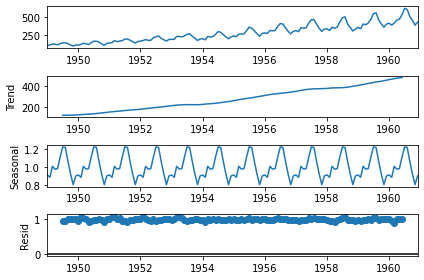

In [19]:
from pylab import rcParams
decom = sm.tsa.seasonal_decompose(new_df, model = 'multiplicative') 
decom.plot()
plt.show()

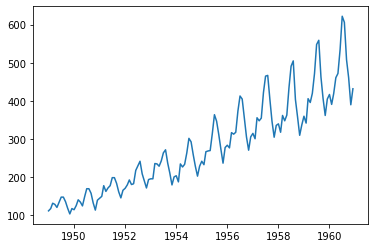

In [20]:
plt.plot(new_df)

mean is not same over the period of time. Thus data is non stationary

checking stationarity further via :-


1. acf, pacf plots


2. adf test


3. rolling stats

In [21]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

C:\Users\user\New folder\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


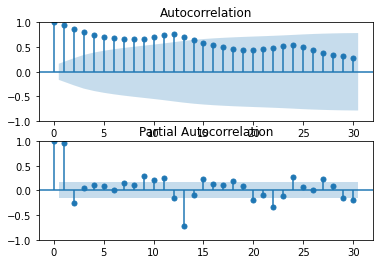

In [22]:
plt.figure()
plt.subplot(211)
plot_acf(new_df['travellers'], ax=plt.gca(), lags = 30)
plt.subplot(212)
plot_pacf(new_df['travellers'], ax=plt.gca(), lags = 30)
plt.show()

no quick drops visible, so it is non stationary

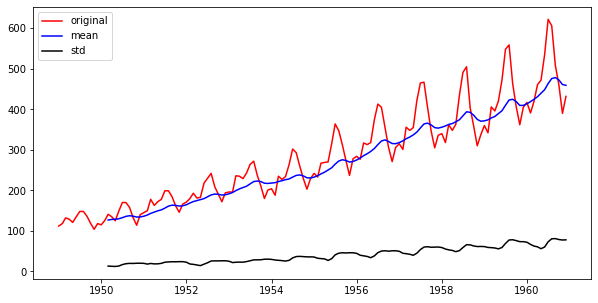

In [23]:
#rolling stats 
plt.figure(figsize=[10,5])
mean=new_df.rolling(15).mean()
std=new_df.rolling(15).std()

plt.plot(new_df, color = 'red', label = 'original')
plt.plot(mean,color='blue',label='mean')
plt.plot(std,color='black',label='std')
plt.legend()
plt.show()

mean, std are not same over the time, so it is non stationary

In [24]:
# Augmented Dickey Fuller Test

from statsmodels.tsa.stattools import adfuller

In [25]:
dftest = adfuller(new_df, autolag = 'AIC')
op = pd.Series(dftest[0:4], index = ['Test stat', 'p-val', 'lag', 'observation'])


for k,v in dftest[4].items():
    op['Critical val (%s)'%k] = v
    
print(op)

Test stat               0.815369
p-val                   0.991880
lag                    13.000000
observation           130.000000
Critical val (1%)      -3.481682
Critical val (5%)      -2.884042
Critical val (10%)     -2.578770
dtype: float64


test stat < critical_Val ?

False -> So, TS is  non-stationary

our TS graph is Non-Stationary, there are 2 main reasons:
    
    1. Trend - varying mean over time
    2. Seasonality - variations at specific-time period

 Thus we apply Transformations:
     it will penalize higher values (cube, square, log)

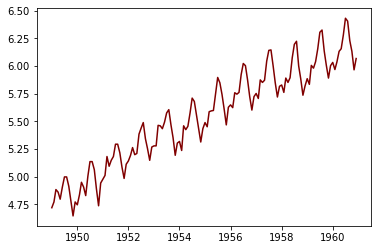

In [26]:
ts_log_transform = np.log(new_df)
plt.plot(ts_log_transform, color = 'maroon')

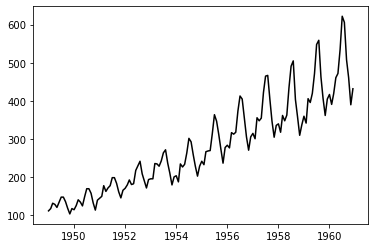

In [27]:
plt.plot(new_df, color = 'black')

# removing trend

by using smoothing(rolling average)

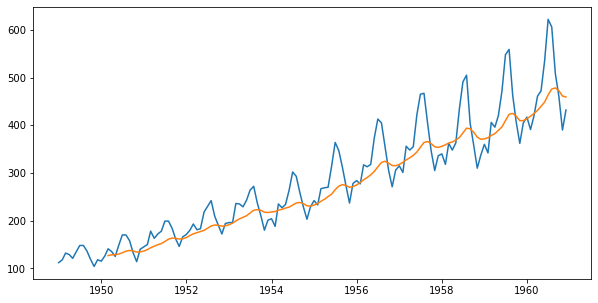

In [28]:
plt.figure(figsize=[10,5])
moving_avg=new_df.rolling(15).mean()
plt.plot(new_df)
plt.plot(moving_avg)  #yellow coloured line

In [30]:
df_log_moving_avg_diff=new_df["travellers"]-moving_avg["travellers"]#subtracting original from moving avg values

In [31]:
df_log_moving_avg_diff

year_month
1949-01-01           NaN
1949-02-01           NaN
1949-03-01           NaN
1949-04-01           NaN
1949-05-01           NaN
                 ...    
1960-08-01    130.066667
1960-09-01     29.666667
1960-10-01    -11.533333
1960-11-01    -71.266667
1960-12-01    -27.200000
Name: travellers, Length: 144, dtype: float64

In [32]:
moving_avg["travellers"]

year_month
1949-01-01           NaN
1949-02-01           NaN
1949-03-01           NaN
1949-04-01           NaN
1949-05-01           NaN
                 ...    
1960-08-01    475.933333
1960-09-01    478.333333
1960-10-01    472.533333
1960-11-01    461.266667
1960-12-01    459.200000
Name: travellers, Length: 144, dtype: float64

In [33]:
#removing null values from df_log_moving_avg_diff
df_log_moving_avg_diff.dropna(inplace=True)


In [35]:
#function to test stationarity

def test_stationarity(data):
    rolling_mean=data.rolling(15).mean()
    rolling_std=data.rolling(15).std()
    
    o=plt.plot(data, color = 'red', label = 'original')
    m=plt.plot(rolling_mean,color='blue',label='mean') #plotting rolling mean
    s=plt.plot(rolling_std,color='black',label='std') #plotting rolling std
    plt.legend()
    plt.show()

    dftest = adfuller(data, autolag = 'AIC')
    op = pd.Series(dftest[0:4], index = ['Test stat', 'p-val', 'lag', 'observation'])


    for k,v in dftest[4].items():
         op['Critical val (%s)'%k] = v
    
    print(op)
    

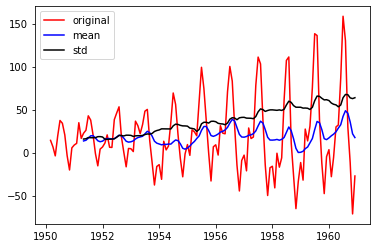

Test stat              -3.136932
p-val                   0.023938
lag                    13.000000
observation           116.000000
Critical val (1%)      -3.488022
Critical val (5%)      -2.886797
Critical val (10%)     -2.580241
dtype: float64


In [36]:
test_stationarity(df_log_moving_avg_diff) #seeing test stationarity's overall graph

test stat < critical val:



is false for 1% but is true for 5% & 10%



thus we have removed a little non stationarity

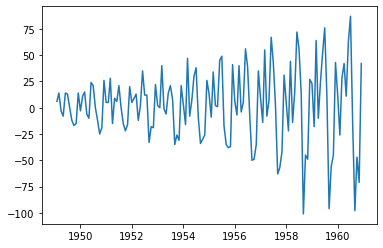

In [39]:
#applying differencing now to change behaviour of the graph
log_diff= new_df["travellers"]- new_df["travellers"].shift()
plt.plot(log_diff)

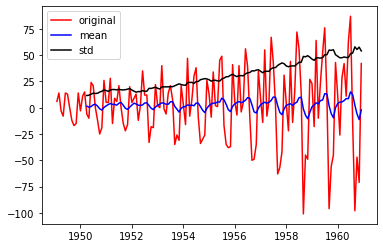

Test stat              -2.829267
p-val                   0.054213
lag                    12.000000
observation           130.000000
Critical val (1%)      -3.481682
Critical val (5%)      -2.884042
Critical val (10%)     -2.578770
dtype: float64


In [40]:
#checking stationarity again now
log_diff.dropna(inplace=True)
test_stationarity(log_diff)

# Model building

In [58]:
from statsmodels.tsa.ar_model import AutoReg

In [60]:
model=AutoReg(log_diff, lags=12)
model_fit=model.fit()

C:\Users\user\New folder\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


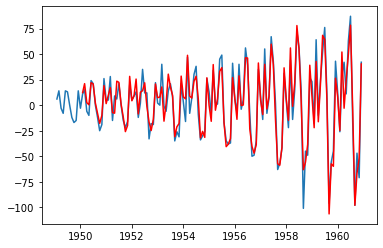

In [62]:
plt.plot(log_diff)
plt.plot(model_fit.fittedvalues,color='red')#predicted values
plt.show()



blue=original data


red=new fitted data

In [63]:
np.nansum((model_fit.fittedvalues-log_diff)**2)

15693.38991340898